# Benchmark Metrics Overview

In benchmarking, crucial metrics such as steps taken per scenario, collision, out of drivable area, exceeded maximum steps and goal reached are recorded.
These metrics are further analyzed under varying conditions of provided belief information. i.e. vanilla belief observer, belief observer with thresholding, belief observer with discretized beliefs and belief observer with thresholding and discretization. Further, varied belief information in the form of behavior subspaces, each representing k in K total hypotheses. i.e. 2, 4, 8 splits of the behavior space also influence learning in the network

## Some necessary imports and utilities

In [23]:
%matplotlib inline
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorboard
import os
import sys
from IPython.display import HTML
# %load_ext tensorboard

exp_dir_root = "/home/ekumar/master_thesis/results/training/december/iqn/"

sns.set_theme(style="whitegrid")
sns.color_palette("Set2")

plt.rcParams['figure.figsize'] = (40.0, 20.0)
plt.rcParams['font.family'] = "serif"
sns.set(font_scale=2)


def load_from_dir(exp_dir):
    return os.path.join(exp_dir_root, exp_dir)

def load_benchmark_data(exp_dir):
    return pd.read_pickle(os.path.join(load_from_dir(exp_dir), "benchmark/data"))

## 2 Split Hypotheses

In this scenario, the behavior space is split into k=2. I.e. belief information tracks two values most representative of the predicted action for a specific observed agent.

### Load Benchmark Metrics

In [24]:
vanilla_2split = load_benchmark_data("exp_van2_lbnw_ld")
thresholding_2split = load_benchmark_data("exp_2_ldth")
discretized_2split = load_benchmark_data("exp_2_lddi64")
thresh_disc_2split = load_benchmark_data("exp_2_lbnw_ld")

concatenated = pd.concat([vanilla_2split.assign(behavior='vanilla_beliefs'), thresholding_2split.assign(behavior='thresholding'),
                          discretized_2split.assign(behavior='discretization'), thresh_disc_2split.assign(behavior='thresholding_and_discretization')])

### Analysis

#### Tabular Results

In [35]:
tab_results = deepcopy(concatenated)

data = tab_results.groupby('behavior')['success', 'collision_other', 'step'].mean().reset_index()
data.set_index('behavior', inplace=True)
data_t = data.transpose()
HTML(data_t.to_html())

behavior,discretization,thresholding,thresholding_and_discretization,vanilla_beliefs
success,0.96,0.99,0.93,0.93
collision_other,0.04,0.01,0.08,0.04
step,13.41,13.70,14.37,16.20


#### Graph Results

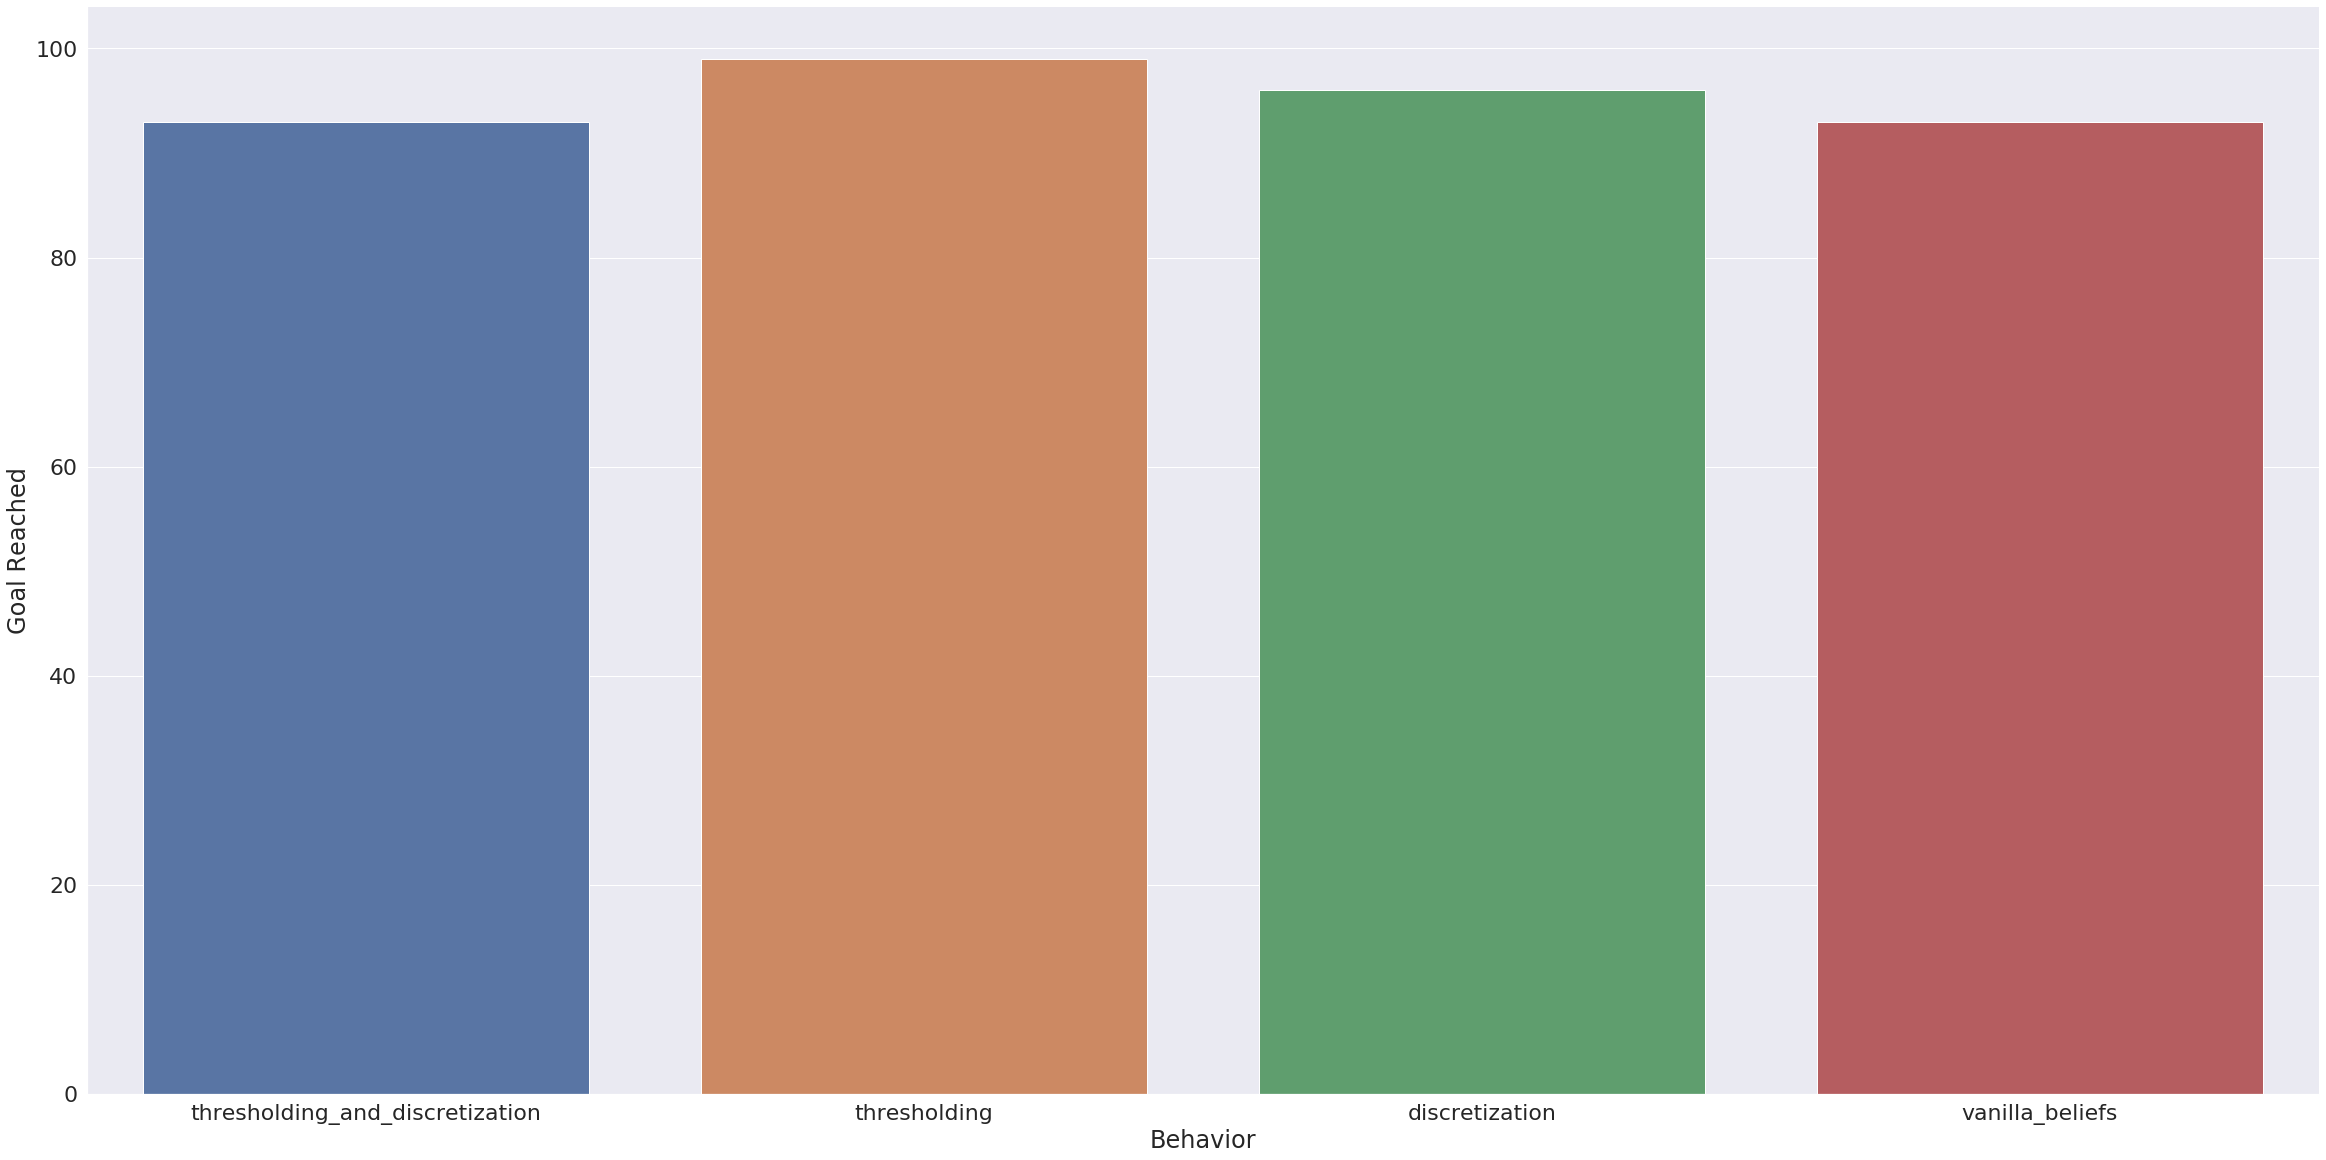

In [26]:
plt.figure()

goal_reached = deepcopy(concatenated)
data = goal_reached[goal_reached.success == True]


dy = sns.countplot(data=data, x='behavior', order = concatenated['behavior'].value_counts().index)
axes = dy.axes
dy.set(xlabel='Behavior', ylabel = "Goal Reached")
dy.spines['top'].set_color('none')
dy.spines['right'].set_color('none')

plt.show()

# dy.figure.savefig('num_goal_reached.png')

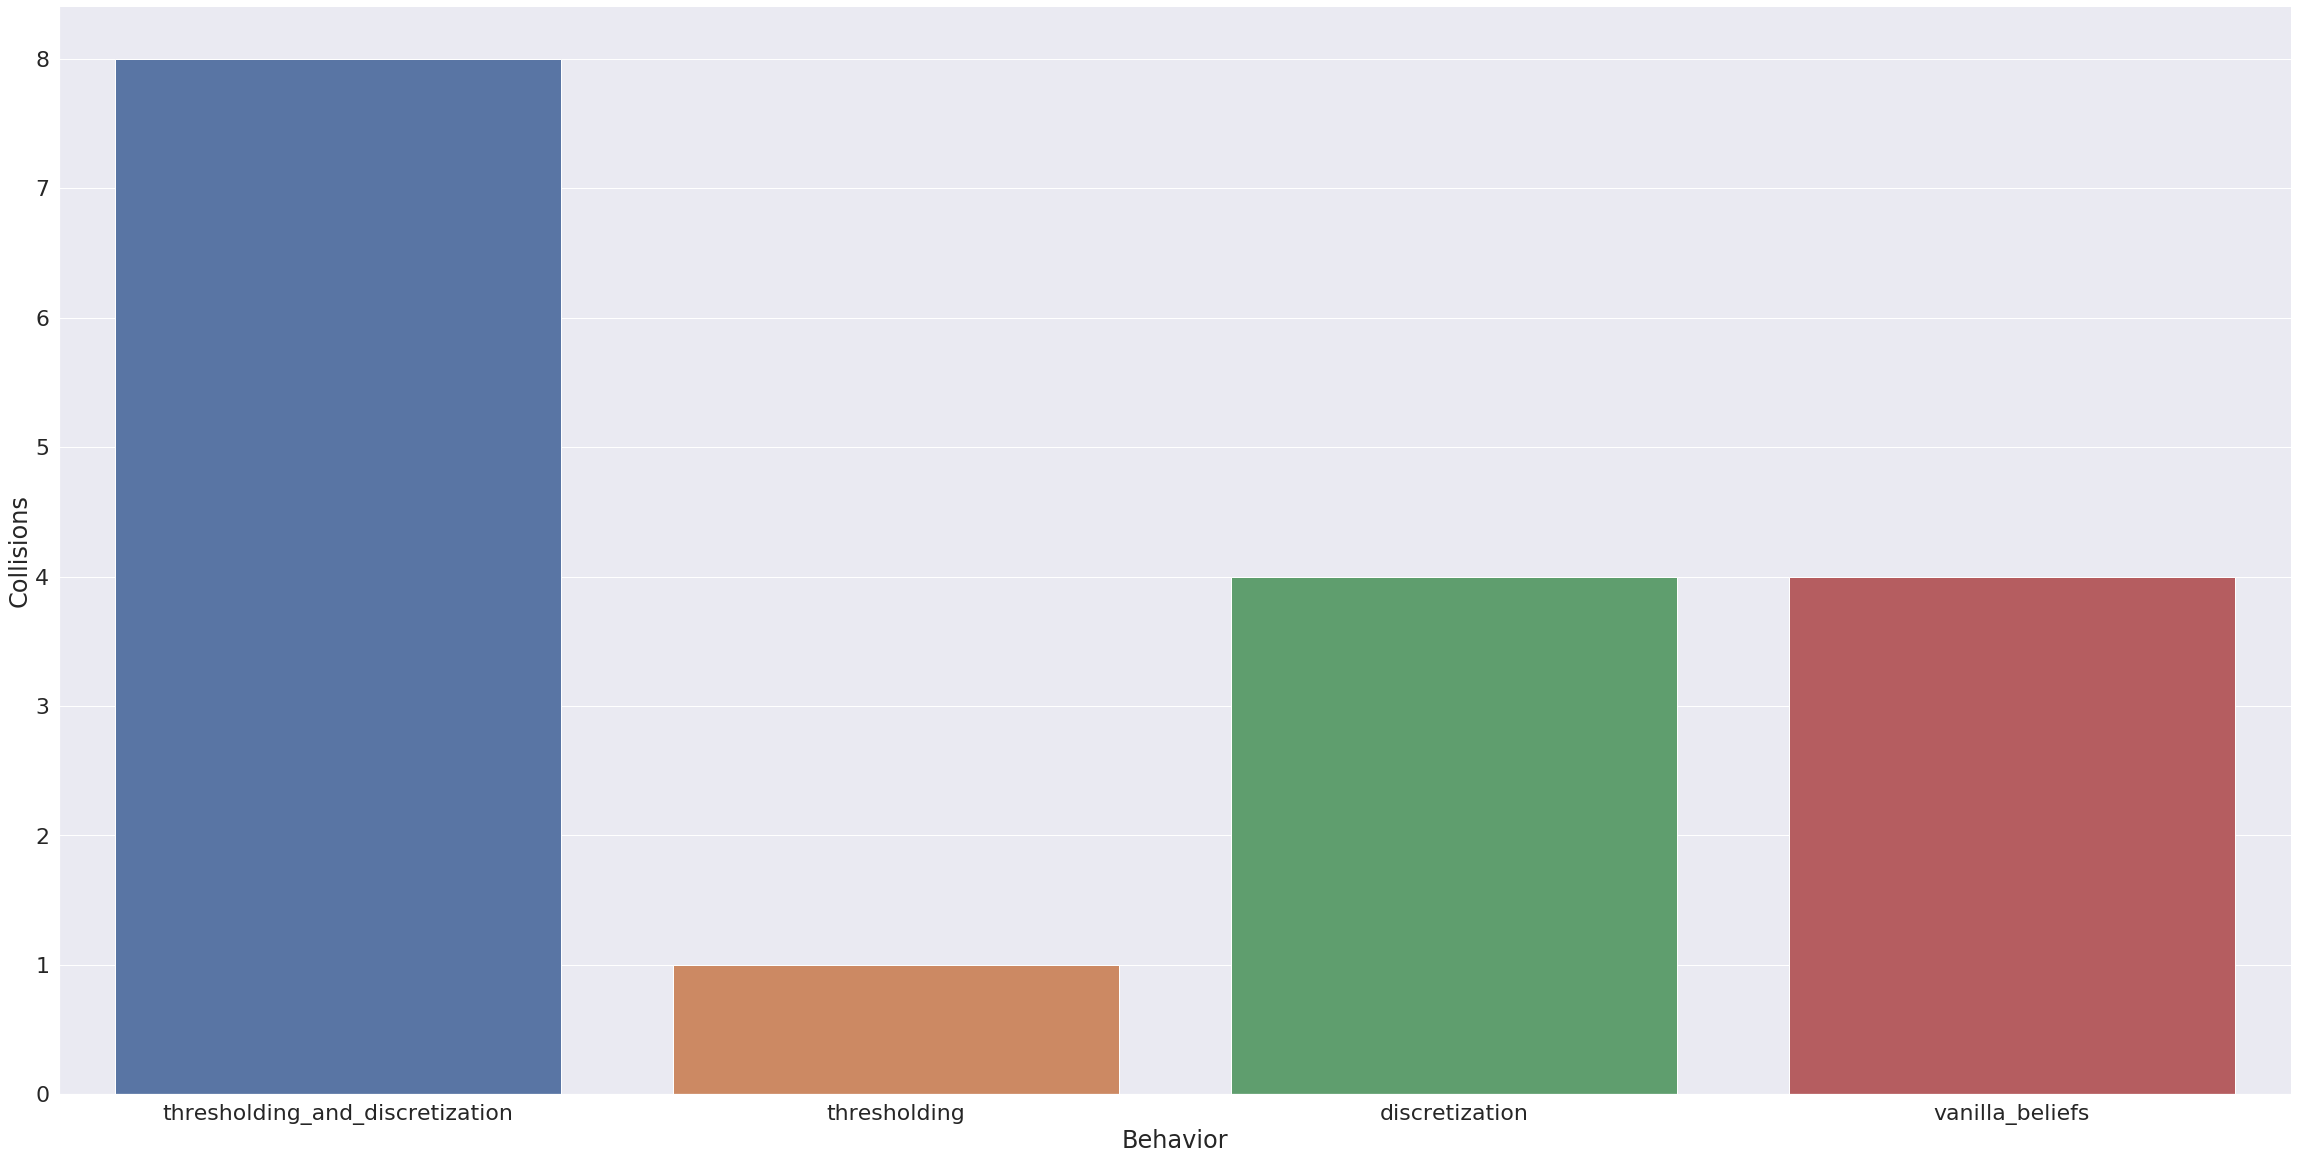

In [27]:
plt.figure()

collision_other = deepcopy(concatenated)
data = collision_other[collision_other.collision_other == True]


dy = sns.countplot(label='medium', data=data, x='behavior', order = concatenated['behavior'].value_counts().index)
axes = dy.axes
dy.set(xlabel='Behavior', ylabel = "Collisions")
dy.spines['top'].set_color('none')
dy.spines['right'].set_color('none')

plt.show()

# dy.figure.savefig('num_collisions.png')

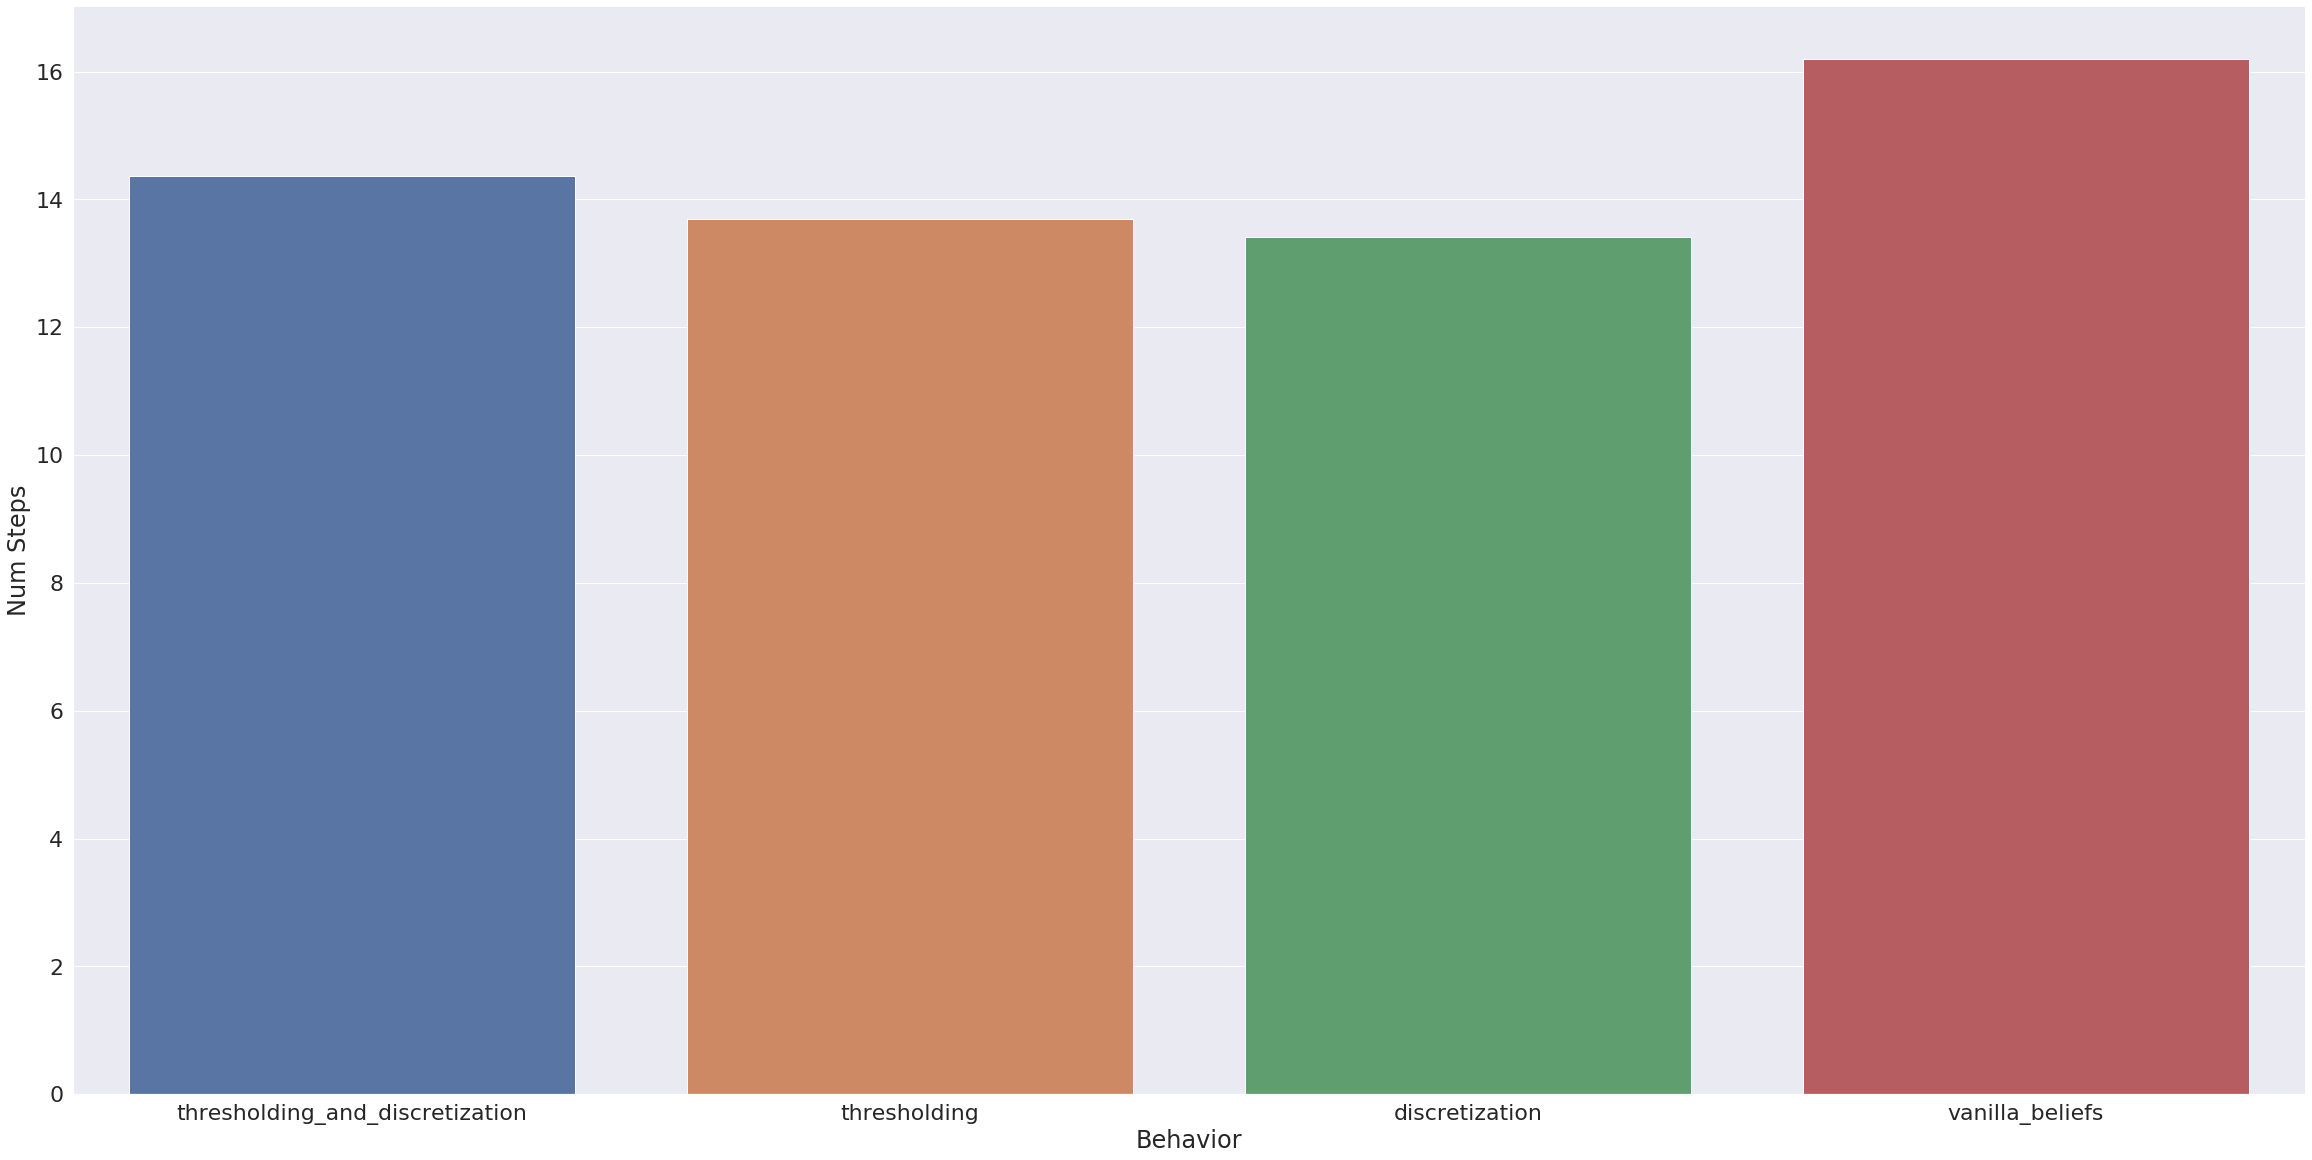

In [29]:
plt.figure()

num_steps = deepcopy(concatenated)
data = num_steps.groupby('behavior')['step'].mean().reset_index()

dy = sns.barplot(data=data, y='step', x='behavior', order = concatenated['behavior'].value_counts().index)
axes = dy.axes
dy.set(xlabel='Behavior', ylabel = "Num Steps")
dy.spines['top'].set_color('none')
dy.spines['right'].set_color('none')

plt.show()

# dy.figure.savefig('max_steps.png')

#### Argumentation

TODO: Compare here the various methods with beliefs and suggest the best alternative amongst belief observer experiments.

## 4 Split Hypotheses

In this scenario, the behavior space is split into k=4. I.e. belief information tracks two values most representative of the predicted action for a specific observed agent.

## Load Benchmark metrics

Once 4 split benmark results are compiled, select the best between 2 split and 4 split and compare results with the vanilla iqn.